<a href="https://colab.research.google.com/github/aditiwu/AriesCurrencyProject/blob/master/Denomination_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, Prerequisites

In [ ]:
!pip install livelossplot==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers.core import Dense
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import LeakyReLU
import random
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from collections import Counter 
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
from google.colab.patches import cv2_imshow

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

# Dataset Analysis

In [ ]:
path = r'//content//drive//MyDrive//Aries Dataset'
d={}
for file in os.listdir(path):
  for file1 in os.listdir(os.path.join(path, file)):
    for file2 in os.listdir(os.path.join(path, file, file1)):
      try:
        d[file]+=1
      except:
        d[file]=1


In [ ]:
for keys,values in d.items(): 

  print(keys) 

  print(values)

  print(' ')

USD
907
 
Euro
503
 
Australian dollar
554
 
Malaysian ringgit
717
 
Polish złoty
472
 
singapore dollar
850
 
thai baht
546
 
turkish lira
611
 
YEN
611
 
NZD
521
 
SEK
613
 
SKW
587
 
Hong Kong dollar-sorted
752
 
Philippine peso-sorted
700
 
Pound Sterling-sorted
484
 
Russian Ruble-sorted
766
 


In [ ]:
path = r'//content//drive//MyDrive//Aries Dataset'
d1={}
for file in os.listdir(path):
  for file1 in os.listdir(os.path.join(path, file)):
    for file2 in os.listdir(os.path.join(path, file, file1)):
      try:
        d1[file+' '+file1]+=1
      except:
        d1[file+' '+file1]=1


In [ ]:
for keys,values in d1.items(): 

  print(keys) 

  print(values)

  print(' ')

USD 1
176
 
USD 5
148
 
USD 10
108
 
USD 20
163
 
USD 50
135
 
USD 100
177
 
Euro 5
115
 
Euro 10
112
 
Euro 50
59
 
Euro 100
111
 
Euro 200
106
 
Australian dollar 5
119
 
Australian dollar 10
100
 
Australian dollar 20
99
 
Australian dollar 50
136
 
Australian dollar 100
100
 
Malaysian ringgit 1
120
 
Malaysian ringgit 5
127
 
Malaysian ringgit 10
112
 
Malaysian ringgit 20
82
 
Malaysian ringgit 50
156
 
Malaysian ringgit 100
120
 
Polish złoty 10
197
 
Polish złoty 20
198
 
Polish złoty 100
31
 
Polish złoty 200
46
 
singapore dollar 5
200
 
singapore dollar 10
200
 
singapore dollar 50
150
 
singapore dollar 100
150
 
singapore dollar 500
150
 
thai baht 50
94
 
thai baht 100
155
 
thai baht 500
150
 
thai baht 1000
147
 
turkish lira 5
126
 
turkish lira 10
149
 
turkish lira 20
150
 
turkish lira 50
125
 
turkish lira 100
61
 
YEN 1000
203
 
YEN 5000
183
 
YEN 10000
225
 
NZD 5
157
 
NZD 20
147
 
NZD 50
112
 
NZD 100
105
 
SEK 20
118
 
SEK 50
193
 
SEK 100
190
 
SEK 500
112
 


# Testing Preprocessing

In [ ]:
x = random.choice(os.listdir(r"//content//drive//MyDrive//Aries Dataset"))
y = random.choice(os.listdir(os.path.join(r"//content//drive//MyDrive//Aries Dataset", x)))
z = random.choice(os.listdir(os.path.join(r"//content//drive//MyDrive//Aries Dataset", x, y)))
path = os.path.join(r"//content//drive//MyDrive//Aries Dataset", x, y, z)
img = cv2.imread(path)

In [ ]:
def part1(image):
    gausBlur = cv2.GaussianBlur(img, (5,5),3) 
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Get binary-mask
    msk = cv2.inRange(hsv, np.array([3, 3, 170]), np.array([240, 255, 255]))
    krn = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
    dlt = cv2.dilate(msk, krn, iterations=1)
    im = np.array(msk, dtype=np.uint8)
    return msk

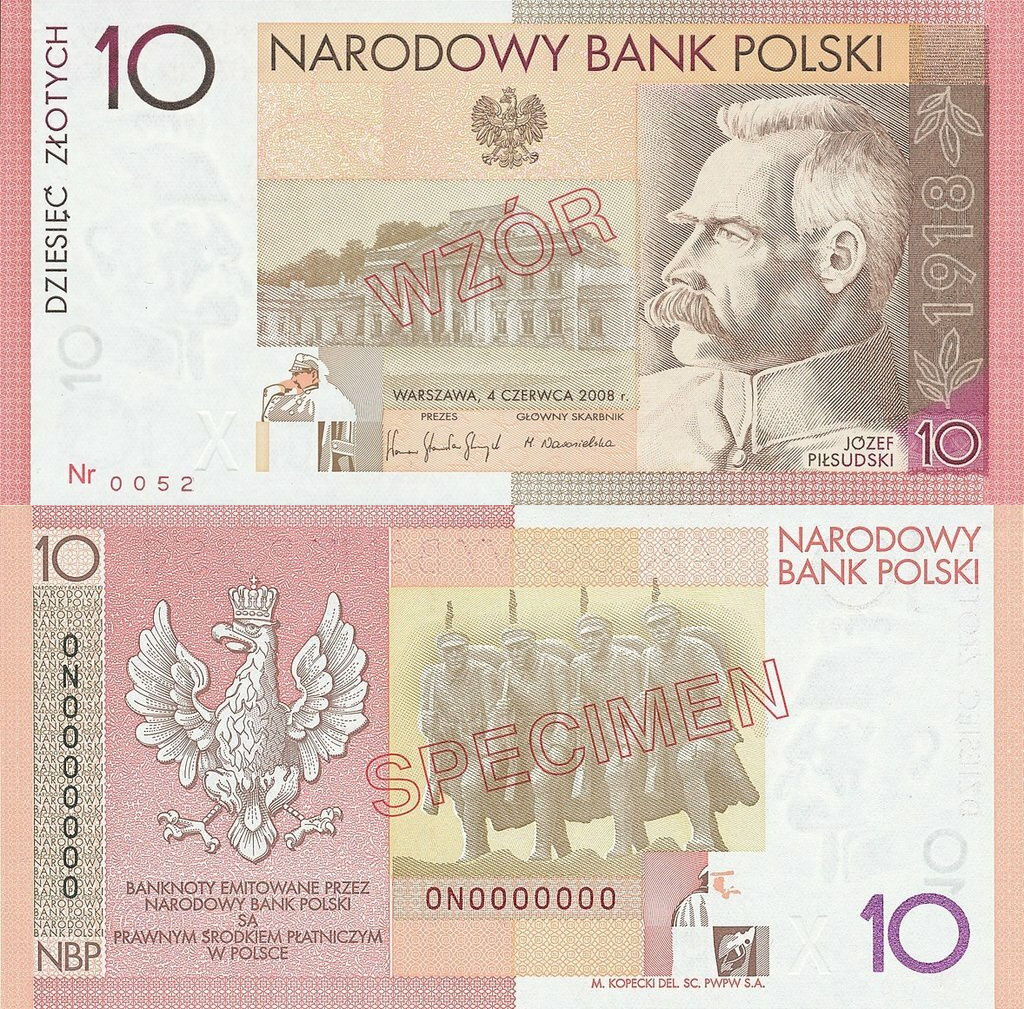

In [ ]:
cv2_imshow(img)

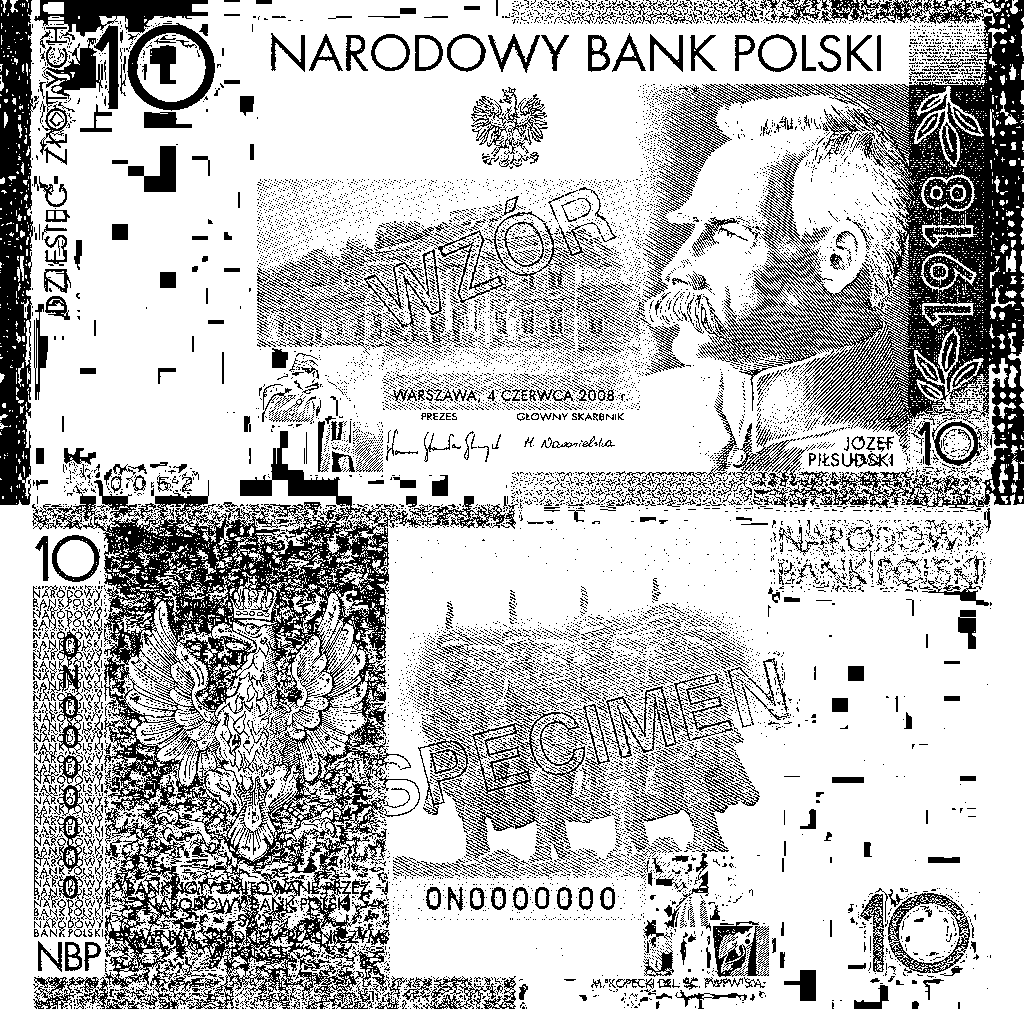

In [ ]:
image = part1(img)
cv2_imshow(image)

# Prepare Dataset

In [ ]:

def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]
    for file in os.listdir(img_folder):
        for file1 in os.listdir(os.path.join(img_folder, file)):
            for file2 in os.listdir(os.path.join(img_folder, file, file1)):
                if(file1=='1'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    #image = part1(image)
                    imgp = np.expand_dims(plt.imread(image_path),0)
                    aug_iter = gen.flow(imgp)
                    aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(3)]
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                    for i in range(3):
                        img = aug_images[i]
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
                    
                elif(file1=='5'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='10'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='20'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='50'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='100'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='200'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    imgp = np.expand_dims(plt.imread(image_path),0)
                    aug_iter = gen.flow(imgp)
                    aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(3)]
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                    for i in range(3):
                        img = aug_images[i]
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
                elif(file1=='500'):
                    try:
                        image_path= os.path.join(img_folder, file, file1,  file2)
                        image= cv2.imread(image_path)
                        #image = part1(image)
                        imgp = np.expand_dims(plt.imread(image_path),0)
                        aug_iter = gen.flow(imgp)
                        aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(1)]
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
                        for i in range(1):
                            img = aug_images[i]
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            image=np.array(image)
                            image = image.astype('float32')
                            image /= 255
                            img_data_array.append(image)
                            class_name.append(file1)
                    except:
                        print(image_path)
                elif(file1=='1000' and file=="SKW"):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    #image = part1(image)
                    imgp = np.expand_dims(plt.imread(image_path),0)
                    aug_iter = gen.flow(imgp)
                    aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(1)]
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                    for i in range(1):
                        img = aug_images[i]
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
                elif(file1=='1000' and file!="SKW"):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    #image = part1(image)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                elif(file1=='5000'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    #image = part1(image)
                    imgp = np.expand_dims(plt.imread(image_path),0)
                    aug_iter = gen.flow(imgp)
                    aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(2)]
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                    for i in range(2):
                        img = aug_images[i]
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
                elif(file1=='10000'):
                    image_path= os.path.join(img_folder, file, file1,  file2)
                    image= cv2.imread(image_path)
                    #image = part1(image)
                    imgp = np.expand_dims(plt.imread(image_path),0)
                    aug_iter = gen.flow(imgp)
                    aug_images = [next(aug_iter)[0].astype(np.float32) for i in range(2)]
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(file1)
                    for i in range(2):
                        img = aug_images[i]
                        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                        image=np.array(image)
                        image = image.astype('float32')
                        image /= 255
                        img_data_array.append(image)
                        class_name.append(file1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'//content//drive//MyDrive//Aries Dataset')


//content//drive//MyDrive//Aries Dataset/Philippine peso-sorted/500/Image_92.gif


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_data,
                                                    class_name,
                                                    test_size=0.3,
                                                    random_state=42)



target_dict={k: v for v, k in enumerate(np.unique(y_train))}
target_val=  [target_dict[y_train[i]] for i in range(len(y_train))]
target_dict1={k: v for v, k in enumerate(np.unique(y_test))}
target_val1=  [target_dict[y_test[i]] for i in range(len(y_test))]
print(target_dict)
print(target_val)
print(len(target_val))




{'1': 0, '10': 1, '100': 2, '1000': 3, '10000': 4, '20': 5, '200': 6, '5': 7, '50': 8, '500': 9, '5000': 10}
[10, 10, 5, 0, 9, 9, 1, 1, 9, 6, 8, 1, 9, 0, 2, 2, 6, 3, 8, 8, 9, 7, 0, 5, 3, 6, 4, 5, 3, 2, 10, 9, 7, 3, 1, 10, 8, 1, 0, 9, 10, 10, 3, 6, 8, 8, 2, 0, 9, 2, 6, 7, 1, 2, 10, 5, 8, 6, 9, 0, 7, 10, 5, 3, 6, 6, 8, 8, 2, 0, 3, 0, 1, 1, 4, 9, 6, 10, 3, 3, 6, 3, 8, 4, 7, 5, 5, 8, 10, 10, 10, 3, 1, 9, 4, 4, 9, 6, 1, 4, 2, 1, 0, 10, 6, 0, 1, 0, 4, 8, 7, 7, 7, 8, 8, 5, 4, 3, 8, 4, 2, 8, 8, 7, 8, 1, 10, 1, 10, 3, 0, 2, 5, 9, 0, 2, 4, 7, 8, 3, 1, 6, 6, 0, 8, 3, 10, 1, 7, 4, 5, 6, 8, 3, 3, 6, 9, 3, 10, 10, 8, 7, 9, 3, 5, 1, 2, 6, 8, 3, 9, 0, 9, 5, 8, 9, 0, 8, 6, 2, 3, 0, 9, 9, 3, 9, 8, 9, 1, 2, 4, 0, 2, 6, 4, 1, 3, 7, 0, 2, 4, 10, 2, 2, 1, 6, 4, 6, 10, 8, 9, 2, 5, 0, 9, 8, 0, 8, 5, 3, 3, 6, 4, 6, 4, 8, 8, 8, 5, 5, 8, 0, 4, 7, 9, 2, 5, 0, 9, 4, 2, 2, 3, 1, 9, 4, 7, 2, 0, 0, 2, 4, 1, 10, 1, 5, 9, 9, 5, 10, 8, 6, 7, 4, 4, 6, 5, 9, 6, 9, 5, 7, 9, 6, 6, 4, 9, 9, 3, 7, 4, 5, 3, 7, 2, 2, 9, 3, 8, 5

In [ ]:
counter=Counter(target_val)
print(counter)

Counter({2: 1132, 8: 1115, 9: 1030, 6: 907, 1: 890, 5: 889, 4: 885, 3: 881, 7: 869, 10: 848, 0: 827})


In [ ]:
file = open("//content//drive//MyDrive//AriesProject//Denomination//img_data.txt", "w")
file.write("%s = %s\n" %("img_data", img_data))
file = open("//content//drive//MyDrive//AriesProject//Denomination//class_name.txt", "w")
file.write("%s = %s\n" %("class_name", class_name))

98741

# Model Denomination

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = models.Sequential()
#model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3) , activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(11))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(x=np.array(X_train, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=10000000, callbacks=[callback])



In [ ]:
test_loss, test_acc = model.evaluate(np.array(X_test, np.float32), np.array(list(map(int,target_val1))))
print('\nTest accuracy: {}'.format(test_acc))
model.save(r'//content//drive//MyDrive//Deno_sample_save')

138/138 [==============================] - 2s 13ms/step - loss: 1.9944 - accuracy: 0.4565

Test accuracy: 0.4565069377422333
INFO:tensorflow:Assets written to: //content//drive//MyDrive//Deno_sample_save/assets
